In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## (a)  Loading data

In [58]:
filename = "wpbc.data"
columns = ["ID", "Outcome"] + [f"Feature_{i}" for i in range (1, 34)]
df = pd.read_csv(filename, header=None, names=columns)

# Transfer 'Outcome' (N, R) to 0 (Non-Recurrent) and 1 (Recurrent)
label_encoder = LabelEncoder()
df["Outcome"] = label_encoder.fit_transform(df["Outcome"])

# Drop the ID column
df.drop(columns=["ID"], inplace=True)


In [59]:
# Check the dataset
print(df.head())
print("The shape of the data set is: ", df.shape)

   Outcome  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        0         31      18.02      27.60     117.50     1013.0    0.09489   
1        0         61      17.99      10.38     122.80     1001.0    0.11840   
2        0        116      21.37      17.44     137.50     1373.0    0.08836   
3        0        123      11.42      20.38      77.58      386.1    0.14250   
4        1         27      20.29      14.34     135.10     1297.0    0.10030   

   Feature_7  Feature_8  Feature_9  ...  Feature_24  Feature_25  Feature_26  \
0     0.1036     0.1086    0.07055  ...      139.70      1436.0      0.1195   
1     0.2776     0.3001    0.14710  ...      184.60      2019.0      0.1622   
2     0.1189     0.1255    0.08180  ...      159.10      1949.0      0.1188   
3     0.2839     0.2414    0.10520  ...       98.87       567.7      0.2098   
4     0.1328     0.1980    0.10430  ...      152.20      1575.0      0.1374   

   Feature_27  Feature_28  Feature_29  Featu

## (b) Creating the Training Set

In [60]:
# Select the first 130 non-recurrent cases and the first 37 recurrent cases as training set.
df_n_rec = df[df["Outcome"] == 0].iloc[:130]
df_rec = df[df["Outcome"] == 1].iloc[:37]

df_train = pd.concat([df_n_rec, df_rec])
df_test = df.drop(df_train.index)  # Set other data as test set.

# Add record #197 in the data set to the training set.
df_train = pd.concat([df_train, df.iloc[[197]]])
df_test = df.drop(df_train.index)

# Devide the dataset to features and labels.
X_train, y_train = df_train.drop(columns=["Outcome"]), df_train["Outcome"]
X_test, y_test = df_test.drop(columns=["Outcome"]), df_test["Outcome"]


In [61]:
# Check the training set and test set
print("Size of training set: ", X_train.shape)
print("Size of test set: ", X_test.shape)

Size of training set:  (168, 33)
Size of test set:  (30, 33)


## (c) Replacing the Missing Features with Median in Training Set.

In [62]:
last_col = X_train.columns[-1]
# Check the number of missing features before processing.
print("Before processing missing values: ")
print((df_train == "?").sum())

Before processing missing values: 
Outcome       0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Feature_31    0
Feature_32    0
Feature_33    3
dtype: int64


In [64]:
if "?" in df_train.values:
    df_train.replace("?", np.nan, inplace=True)
    last_column = df_train.columns[-1]  
    df_train[last_column] = df_train[last_column].astype(float)  
    df_train[last_column].fillna(df_train[last_column].median(), inplace=True)  

if "?" in df_test.values:
    df_test.replace("?", np.nan, inplace=True)
    last_column_test = df_test.columns[-1]  
    df_test[last_column_test] = df_test[last_column_test].astype(float)
    df_test[last_column_test].fillna(df_test[last_column_test].median(), inplace=True)


In [65]:
# Check the number of missing features after processing.
print("After processing missing values: ")
print((df_train == "?").sum())
print((df_test == "?").sum())

After processing missing values: 
Outcome       0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Feature_31    0
Feature_32    0
Feature_33    0
dtype: int64
Outcome       0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_2

In [66]:
# Devide features and labels after processing.
X_train, y_train = df_train.drop(columns=["Outcome"]), df_train["Outcome"]
X_test, y_test = df_test.drop(columns=["Outcome"]), df_test["Outcome"]

## (d) Binary Classification Using Naïve Bayes' Classifiers

### (i) Naïve Bayes' Classifiers

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [68]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)
print(X_train.isna().sum().sum())

0


Training Set Metrics: 
Confusion Matrix: 
 [[103  28]
 [ 17  20]]
Precision: 
 0.4166666666666667
Recall: 
 0.5405405405405406
F1 Score: 
 0.47058823529411764
AUC: 
 0.7276665978956056
Test Set Metrics: 
Confusion Matrix: 
 [[12  8]
 [ 5  5]]
Precision: 
 0.38461538461538464
Recall: 
 0.5
F1 Score: 
 0.43478260869565216
AUC: 
 0.5900000000000001


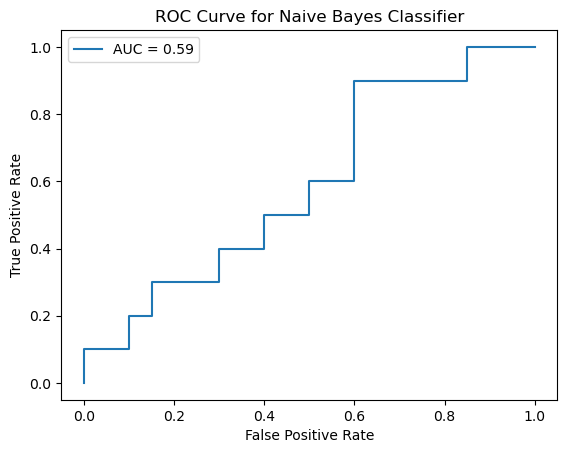

In [69]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Prediction
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
print("======================================")
print("Training Set Metrics: ")
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred))
print("Precision: \n", precision_score(y_train, y_train_pred))
print("Recall: \n", recall_score(y_train, y_train_pred))
print("F1 Score: \n", f1_score(y_train, y_train_pred))
print("AUC: \n", roc_auc_score(y_train, nb_classifier.predict_proba(X_train)[:, 1]))

print("======================================")
print("Test Set Metrics: ")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Precision: \n", precision_score(y_test, y_test_pred))
print("Recall: \n", recall_score(y_test, y_test_pred))
print("F1 Score: \n", f1_score(y_test, y_test_pred))
print("AUC: \n", roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1]))

# Plotting the ROC curve
print("======================================")
auc_test = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'AUC = {auc_test:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.show()


### (ii) Balance the Data Set Using SMOTE

In [70]:
downsample_size = 90
smote = SMOTE(sampling_strategy=1.0, k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Training Set Metrics after SMOTE: 
Confusion Matrix: 
 [[94 37]
 [44 87]]
Precision: 
 0.7016129032258065
Recall: 
 0.6641221374045801
F1 Score: 
 0.6823529411764706
AUC: 
 0.7700017481498747
Test Set Metrics after SMOTE: 
Confusion Matrix: 
 [[13  7]
 [ 4  6]]
Precision: 
 0.46153846153846156
Recall: 
 0.6
F1 Score: 
 0.5217391304347826
AUC: 
 0.695


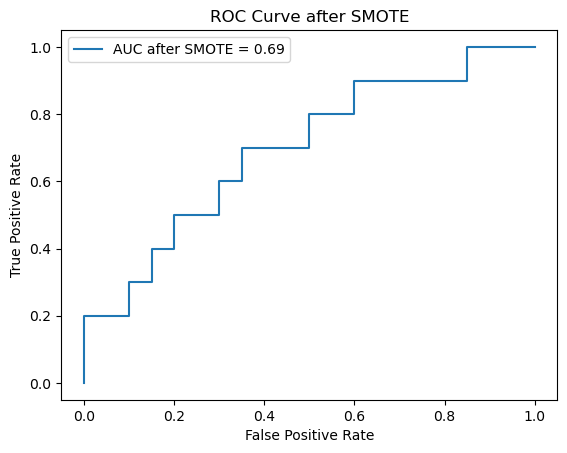

In [71]:


# Re-Training the model.
nb_classifier_smote = GaussianNB()
nb_classifier_smote.fit(X_train_smote, y_train_smote)

y_train_pred_smote = nb_classifier_smote.predict(X_train_smote)
y_test_pred_smote = nb_classifier_smote.predict(X_test)

# Calculate evaluation metrics after SMOTE
print("======================================")
print("Training Set Metrics after SMOTE: ")
print("Confusion Matrix: \n", confusion_matrix(y_train_smote, y_train_pred_smote))
print("Precision: \n", precision_score(y_train_smote, y_train_pred_smote))
print("Recall: \n", recall_score(y_train_smote, y_train_pred_smote))
print("F1 Score: \n", f1_score(y_train_smote,y_train_pred_smote))
print("AUC: \n", roc_auc_score(y_train_smote, nb_classifier_smote.predict_proba(X_train_smote)[:, 1]))

print("======================================")
print("Test Set Metrics after SMOTE: ")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_smote))
print("Precision: \n", precision_score(y_test, y_test_pred_smote))
print("Recall: \n", recall_score(y_test, y_test_pred_smote))
print("F1 Score: \n", f1_score(y_test, y_test_pred_smote))
auc_test_smote = roc_auc_score(y_test, nb_classifier_smote.predict_proba(X_test)[:, 1])
print("AUC: \n", auc_test_smote)

# Plotting the ROC curve after SMOTE
print("======================================")
fpr, tpr, _ = roc_curve(y_test, nb_classifier_smote.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'AUC after SMOTE = {auc_test_smote:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after SMOTE')
plt.legend()
plt.show()

#### SMOTE does help.